In [17]:
import keras
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
import numpy as np
import tensorflow as tf
import warnings

warnings.filterwarnings('ignore')

In [26]:
def capture():
    vid = cv2.VideoCapture(0)
    
    while(True):
        
        # Capture the video frame
        # by frame
        ret, frame = vid.read()

        # Display the resulting frame
        cv2.imshow('frame', frame)

        # the 'q' button is set as the
        # quitting button you may use any
        # desired button of your choice
        if cv2.waitKey(10000): #& 0xFF == ord('q'):
            break
    
    # After the loop release the cap object
    vid.release()
    # Destroy all the windowsq
    cv2.destroyAllWindows()
    return frame

def extract(frame):
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(frame)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # bug fix
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = frame[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize((160,160))
    return image

1/1 [==============================] - 0s 289ms/step


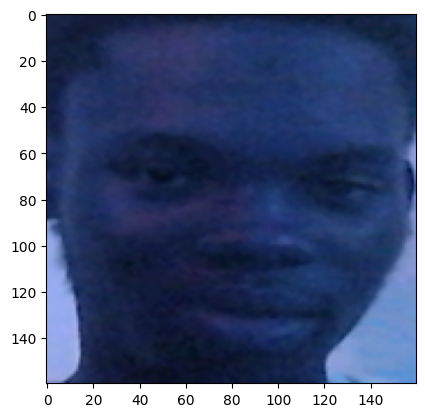

In [27]:
frame = capture()
img = extract(frame)
plt.imshow(img)

In [29]:
np.asarray(img).shape

(160, 160, 3)

In [23]:
def img_to_encoding(img, model):
    img = np.around(np.array(img) / 255.0, decimals=12)
    x_train = np.expand_dims(img, axis=0)
    embedding = model.predict_on_batch(x_train)
    return embedding / np.linalg.norm(embedding, ord=2)

In [24]:
model = keras.models.load_model('./converted.h5')

encoding = img_to_encoding(img,  model)

In [25]:
encoding

array([[-0.0405427 , -0.11535475, -0.04183887, -0.12397057,  0.11855733,
         0.04687705,  0.01473745, -0.06262625,  0.00335201,  0.05810225,
         0.05034121, -0.07116945,  0.03857725, -0.10048171, -0.00765516,
         0.12006756,  0.08934052, -0.09206832,  0.09315444, -0.13040653,
         0.06225732,  0.0408612 , -0.0621262 , -0.00880502,  0.03430846,
        -0.05022002,  0.12505049,  0.07942005, -0.03005412,  0.00245882,
        -0.02766726,  0.08487909,  0.03738648, -0.01006141,  0.12905163,
        -0.13563882,  0.02243686,  0.01812308,  0.10970204,  0.00747517,
         0.07514226, -0.00367398, -0.03640724, -0.03811413, -0.09795315,
        -0.15689619, -0.00474704, -0.02318277,  0.1345705 ,  0.06939548,
        -0.15399097,  0.09207701,  0.02687418, -0.10562665,  0.02752337,
         0.0283734 ,  0.15499268,  0.02990248, -0.09257054, -0.2580476 ,
        -0.10908062, -0.08030085, -0.01845203,  0.22400564, -0.0712162 ,
         0.13106273,  0.1014622 ,  0.00800887,  0.0